<a href="https://colab.research.google.com/github/AnacletoLAB/grape/blob/main/tutorials/TransE_to_embed_Cora.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Using TransE to compute STRING's Species Tree node embedding
In the following tutorial we will compute Cora's node embedding using TransE, both using the high-level pipeline and the model itself.

We start by installing the GraPE library:

```bash
pip install grape -U
```

In [4]:
!pip install -q grape -U

You should consider upgrading via the '/Users/lucacappelletti/opt/miniconda3/bin/python -m pip install --upgrade pip' command.


## Retrieving Cora
We will now proceed to retrieve the Cora graph, using Ensmallen's automatic graph retrieval. You can learn more about the automatic graph retrieval in [add tutorial reference here].

In [5]:
from grape.datasets.string import SpeciesTree

In [6]:
graph = SpeciesTree()

### Taking a look at the graph report

In [7]:
graph

<div class="graph-report"><style>.graph-report li {margin: 0.5em 0 0.5em 0;}.graph-report .paragraph {text-align: justify;word-break: break-all;}.graph-report .small-columns {column-count: 4;column-gap: 2em;}.graph-report .medium-columns {column-count: 3;column-gap: 2em;}.graph-report .large-columns {column-count: 2;column-gap: 2em;}.graph-report .single-column {}@media only screen and (max-width: 600px) {.graph-report .small-columns {column-count: 1;}.graph-report .medium-columns {column-count: 1;}.graph-report .large-columns {column-count: 1;}}@media only screen and (min-width: 600px) and (max-width: 800px) {.graph-report .small-columns {column-count: 2;}.graph-report .medium-columns {column-count: 1;}.graph-report .large-columns {column-count: 1;}}@media only screen and (min-width: 800px) and (max-width: 1024px) {.graph-report .small-columns {column-count: 3;}.graph-report .medium-columns {column-count: 2;}.graph-report .large-columns {column-count: 1;}}</style><h2>SpeciesTree</h2><p class="paragraph">The undirected graph SpeciesTree has 24.62K heterogeneous nodes and 24.61K heterogeneous edges. The graph is connected, that is, it is composed of a single connected component that includes all nodes and edges. The RAM requirements for the nodes and edges data structures are 3.63MB and 99.70KB respectively.</p><h3 style="margin: 1em 0 0 0;">Degree centrality</h3><p class="paragraph">The minimum node degree is 1, the maximum node degree is 163, the mode degree is 1, the mean degree is 2.00 and the node degree median is 1.</p><p class="paragraph">The nodes with the highest degree centrality are Lactobacillus (degree 163 and node type Bacteria), Streptomyces (degree 156 and node type Bacteria), Bacillus (degree 128 and node type Bacteria), unclassified Streptomyces (degree 123 and node type Bacteria) and Rhodobacteraceae (degree 105 and node type Bacteria).</p><h3 style="margin: 1em 0 0 0;">Node types</h3><p class="paragraph">The graph has 4 node types, which are Bacteria (19.13K nodes, 77.72%), Eukaryota (4.50K nodes, 18.27%), Archaea (987 nodes, 4.01%) and Ancestral. The RAM requirement for the node types data structure is 1.28MB.</p><h4 style="margin: 1em 0 0 0;">Singleton node types</h4><p class="paragraph">Singleton node types are node types that are assigned exclusively to a single node, making the node type relatively meaningless, as it adds no more information than the node name itself. The graph contains a singleton node type, which is Ancestral (node cellular organisms (degree 3 and node type Ancestral)).</p><h3 style="margin: 1em 0 0 0;">Edge types</h3><p class="paragraph">The graph has 3 edge types, which are Bacteria (38.26K edges, 77.72%), Eukaryota (8.99K edges, 18.27%) and Archaea (1.97K edges, 4.01%). The RAM requirement for the edge types data structure is 394.23KB.</p><h3 style="margin: 1em 0 0 0;">Topological Oddities</h3><p class="paragraph">A topological oddity is a set of nodes in the graph that <i>may be derived</i> by an error during the generation of the edge list of the graph and, depending on the task, could bias the results of topology-based models. In the following paragraph, we will describe the detected topological oddities.</p><h4 style="margin: 1em 0 0 0;">Trees</h4><p class="paragraph">A tree is a connected component with <code>n</code> nodes and <code>n-1</code> edges. We have detected  a single tree in the graph, involving a total of 24.62K nodes (100.00%) and 24.61K edges (50.00%).</p><ul class="large-columns"><li><p class="paragraph">Tree starting from the root node Vertebrata (degree 3 and node type Eukaryota), and containing 24.62K nodes, with a maximal depth of 34, which are Gnathostomata (degree 3 and node type Eukaryota), Craniata (node type Eukaryota), Cyclostomata (degree 3 and node type Eukaryota), Chondrichthyes (degree 3 and node type Eukaryota) and Teleostomi (node type Eukaryota). Its nodes have 4 node types, which are Bacteria (19.13K nodes, 77.72%), Eukaryota (4.50K nodes, 18.2

## Running TransE

In [16]:
from grape.embedders import TransEEnsmallen

model = TransEEnsmallen(epochs=1000)
embedding = model.fit_transform(graph)

Let's take a look at the obtained node embedding:

In [17]:
embedding.get_node_embedding_from_index(0)

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
Bacteria,0.045415,0.130865,-0.129481,-0.099561,-0.024270,0.070149,0.000073,-0.115339,0.057762,0.012925,...,0.063766,-0.084295,-0.208408,-0.077783,-0.048382,0.025742,-0.052011,0.036573,-0.034049,0.151750
Azorhizobium,-0.087897,0.094558,0.025569,-0.020594,0.070933,-0.087524,0.111400,-0.087089,0.070418,0.041068,...,0.135930,0.263960,0.032886,0.108775,0.111559,-0.143170,0.169311,-0.120957,0.109520,-0.168386
Azorhizobium caulinodans,-0.096230,0.069281,-0.000460,-0.049708,0.019211,-0.072355,0.124525,-0.091849,0.181915,-0.008929,...,0.109256,0.269114,0.049903,0.172471,0.139452,-0.099964,0.220169,-0.203174,0.061289,-0.095311
Buchnera aphidicola,0.073672,-0.133808,-0.030542,0.084391,0.069326,-0.075988,0.089681,0.070914,0.020690,0.031835,...,-0.051026,0.054645,-0.149624,-0.061346,-0.139168,-0.045210,0.121569,0.030118,0.231429,0.128835
Cellvibrio,-0.061496,-0.008130,-0.068399,0.059584,-0.003554,-0.042029,0.150227,0.066721,-0.042320,-0.130598,...,0.019670,0.234818,0.168765,-0.003347,0.011759,-0.016118,0.169430,0.037053,-0.017239,0.072719
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Isosphaerales,0.154117,-0.016770,0.086500,-0.149951,0.094573,0.053689,-0.152210,0.056601,0.112549,0.200215,...,-0.066148,-0.118285,-0.163198,-0.083595,-0.033310,-0.049675,-0.143672,0.163095,-0.021075,-0.035984
Pirellulaceae,0.073992,-0.012886,0.018530,-0.141661,0.061556,0.158021,-0.007014,0.012470,0.073500,0.108852,...,-0.009293,0.088466,-0.020398,0.027762,0.026018,-0.063426,-0.100507,0.142037,-0.089187,-0.066257
Gleimia,0.050974,0.122436,-0.026094,-0.145309,0.116835,0.058152,-0.132360,0.030285,-0.014299,0.105915,...,0.056323,-0.045259,-0.057364,-0.167035,-0.058833,0.009452,-0.094699,-0.033759,0.145341,0.034964
Winkia,0.035476,0.105145,-0.052913,-0.167205,0.063700,0.090459,-0.166160,0.057810,0.004267,0.072968,...,-0.019188,-0.035646,0.058686,-0.128938,-0.000010,0.060125,-0.074353,-0.142077,0.093805,0.126160


In [18]:
embedding.get_edge_type_embedding_from_index(0)

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
Bacteria,-0.043012,-0.257371,-0.142815,0.127713,-0.240289,0.141890,0.082453,-0.127186,0.397310,-0.171632,...,-0.165140,0.163878,0.163992,0.204301,0.170052,0.050329,0.164414,-0.347209,-0.075690,0.206264
Archaea,0.062207,0.089157,0.182667,0.085279,0.120802,-0.191619,-0.088840,-0.095055,-0.011433,0.214854,...,0.060506,-0.057029,-0.152795,-0.003302,0.016534,-0.184743,0.095567,0.114093,0.387509,-0.051359
Eukaryota,-0.081532,0.074206,0.075571,0.174382,-0.019179,-0.123412,0.086540,-0.184053,-0.074557,0.104282,...,0.258569,0.329884,-0.181685,-0.147362,-0.211251,-0.274065,0.072426,0.212152,0.236305,-0.330496


## Graph visualization
Let's now visualize the two node embeddings. We can use the graph visualization tool available from the Embiggen module.

In [19]:
from grape.visualizations import GraphVisualizer

We create the visualizer object.

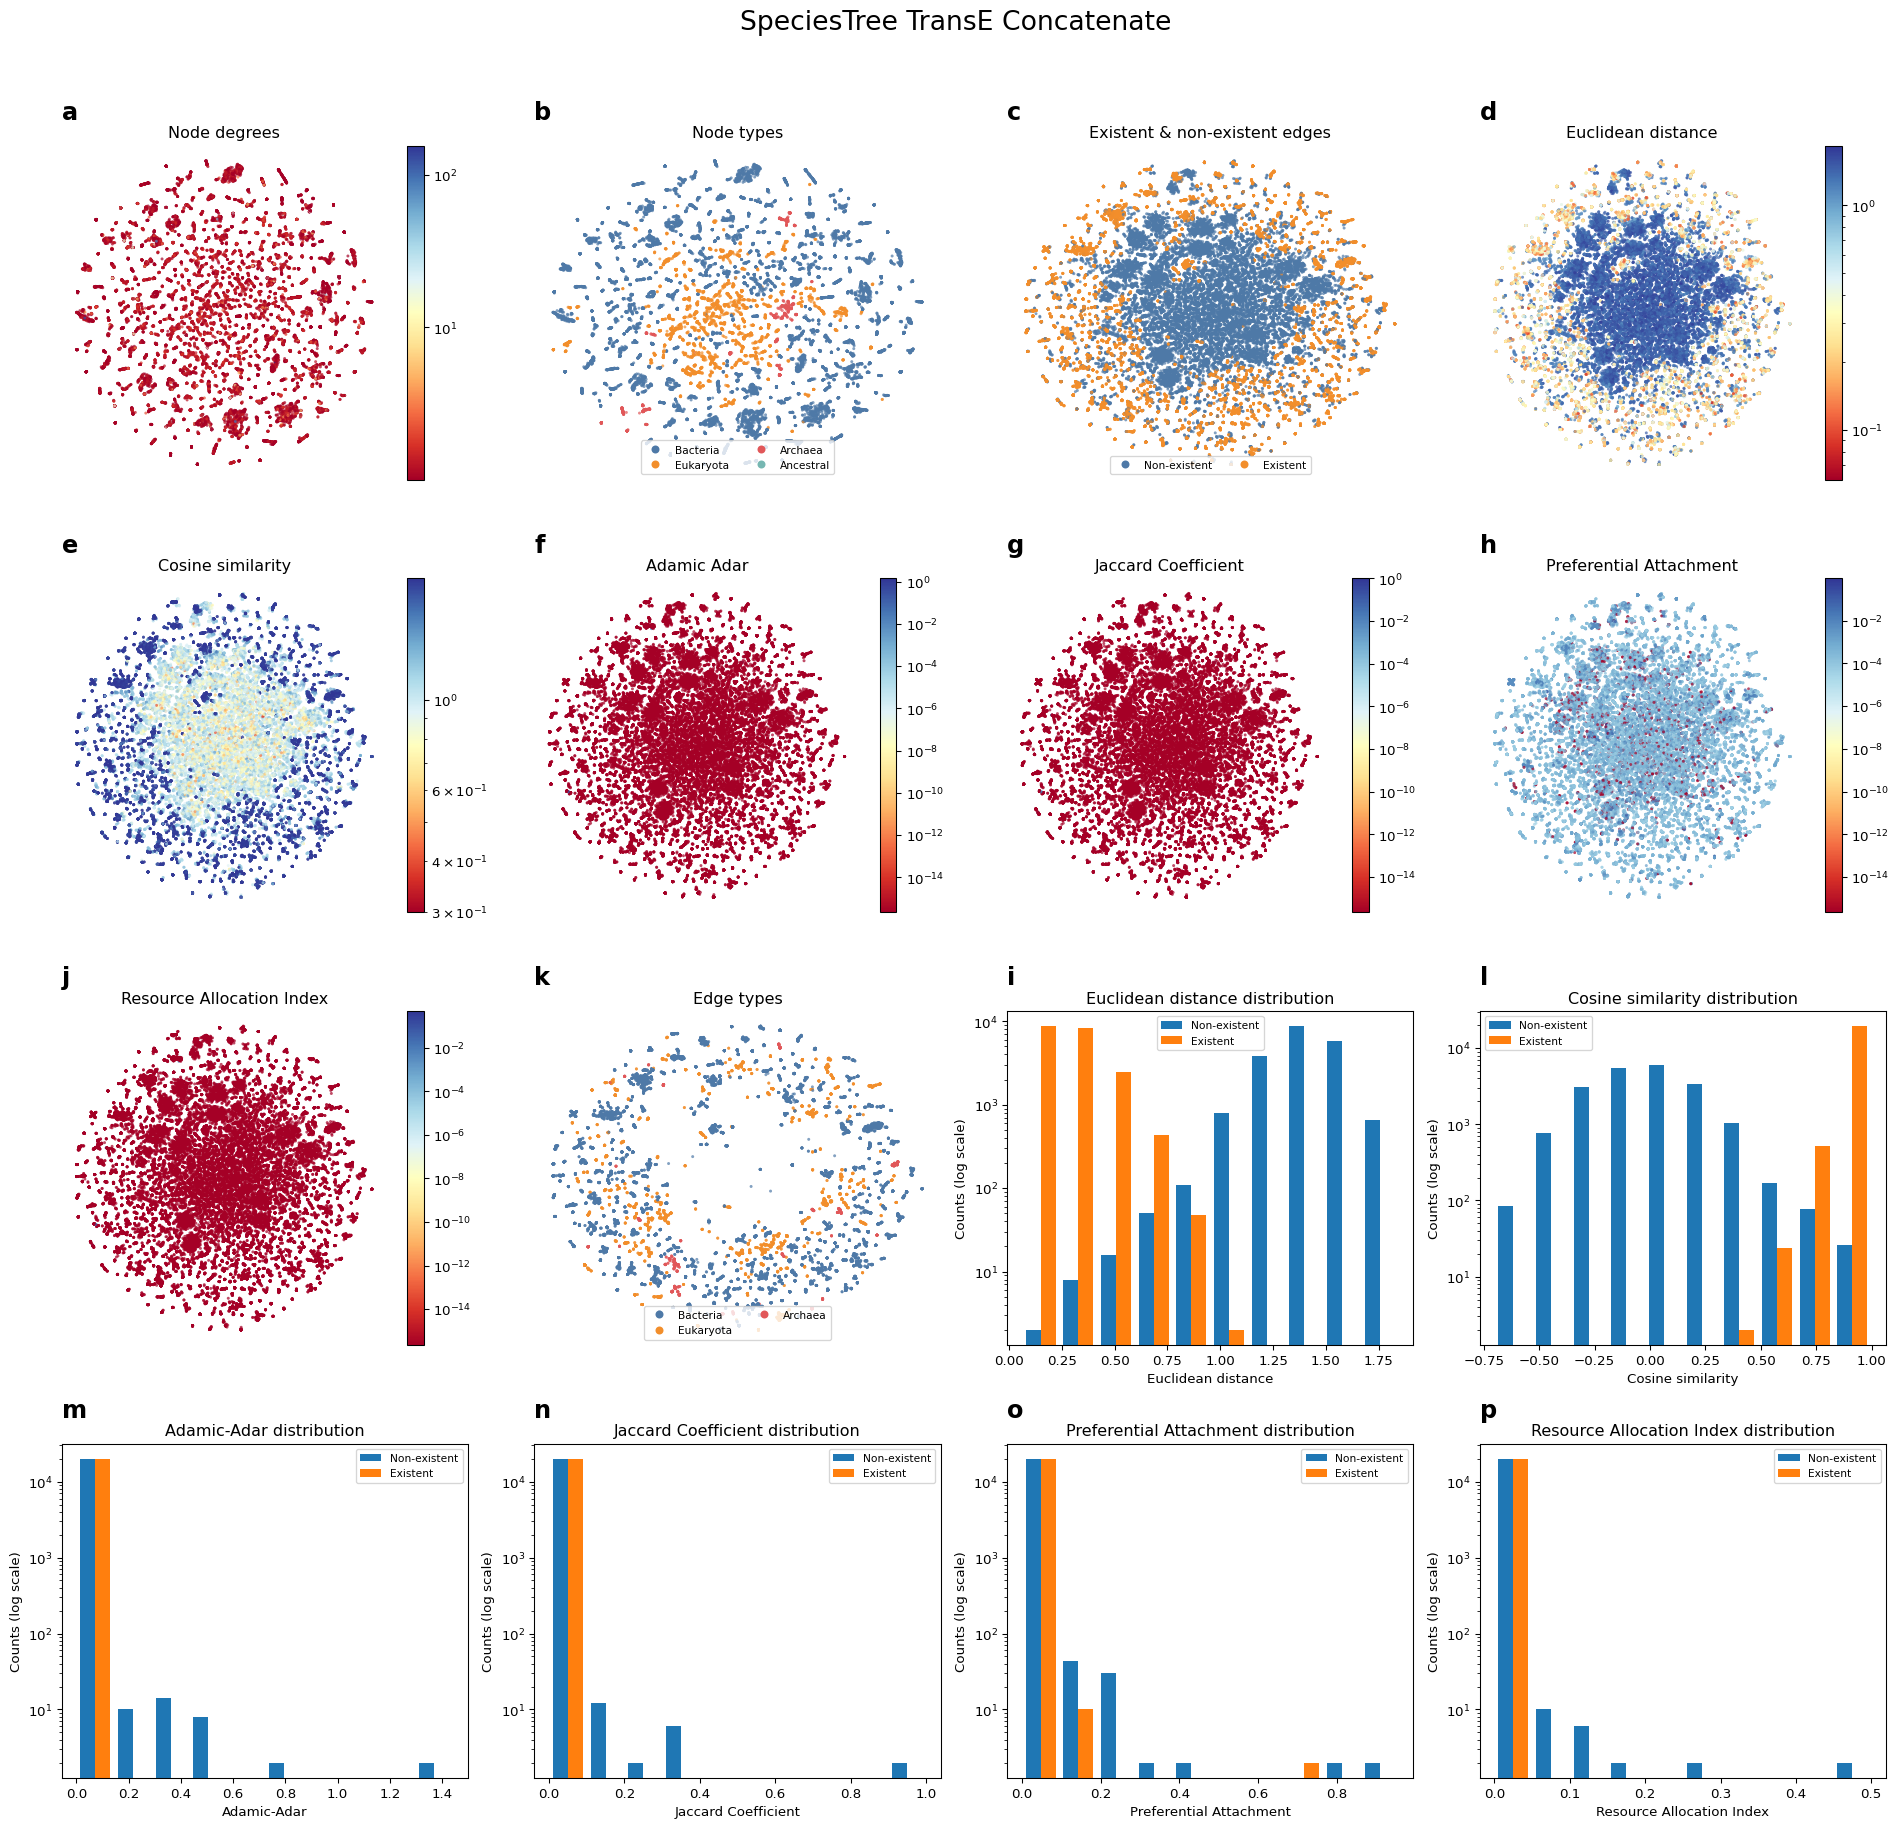

In [21]:
GraphVisualizer(
    graph,
    node_embedding_method_name="TransE",
    decomposition_kwargs=dict(metric="cosine")
).fit_and_plot_all(embedding.get_node_embedding_from_index(0))